# **Project Term Machine Learning**
## **San Francisco Crime Classification**

In [ ]:
student_name_1 = "Salvador Robles Herrera"
student_name_2 = "Enrique Bencomo Basoco"
student_id_1 = "80683116"
student_id_2 = "80694579"

## **Introduction**

The goal of this project is to practice our Machine Learning skills and be able to use data from the real world to make predictions. During this project we will be attempting to avoid bias by analyzing the dataset and the context provided. In this contest from Kaggle, we are given a dataset of 12 years of crime reports in San Francisco (2003 to 2015).

We will understand the train and testing data, and use Feature Engineering in order for our models to have better accuracy. After all of this pre-analysis and pre-work we will proceed to create our Machine Learning models, which will predict the category of the crime that ocurred for the test data.

At the end there will be a submission to the Kaggle contest platform and see how our models stack up against other people's models.



## **Set Up**

* Let's get out data ready to be used and manipulated for the rest of this project. 

* Start by importing all the necessary libraries and downloading the correspoding dataset from Kaggle.

* Kaggle doesn't provide us with the predictiong for the testing data, so let us just have X_train, Y_train, and X_test.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns  # for nicer plots
sns.set(style='darkgrid')  # default style
import plotly.graph_objs as plotly  # for interactive plots
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import gc

In [ ]:
# Upload kaggle json file with token
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


* Now download the corresponding given files from the SF Crime dataset. 
* Since they come as CSV files, unzipping of the files is done.

In [ ]:
! kaggle competitions download -c sf-crime -f sampleSubmission.csv.zip
! kaggle competitions download -c sf-crime -f test.csv.zip
! kaggle competitions download -c sf-crime -f train.csv.zip
! unzip \*.zip && rm *.zip

  0% 0.00/2.35M [00:00<?, ?B/s]
100% 2.35M/2.35M [00:00<00:00, 179MB/s]
 27% 5.00M/18.7M [00:00<00:00, 31.1MB/s]
100% 18.7M/18.7M [00:00<00:00, 90.0MB/s]
 23% 5.00M/22.1M [00:00<00:00, 20.2MB/s]
100% 22.1M/22.1M [00:00<00:00, 70.9MB/s]
Archive:  test.csv.zip
  inflating: test.csv                

Archive:  sampleSubmission.csv.zip
  inflating: sampleSubmission.csv    

Archive:  train.csv.zip
  inflating: train.csv               

3 archives were successfully processed.


## **Data Analysis**

We'll be using the [SF Crime](https://www.kaggle.com/competitions/sf-crime/data) dataset. Each crime report in the test data training the following features:
* Date
* Category/Class
* Description
* Day of the Week
* Police Department District
* Resolution
* Street Address
* X Coordinate
* Y Coordinate


Now, transform the CSV files into Numpy arrays. Which is easier for the data to be accessed and manipulated.

In [ ]:
# Get a glimpse of the train dataset
def open_csv_file(filename):
  df = pd.read_csv(filename)
  print(df.head())

  return np.array(df.values)

X_train = open_csv_file('/content/train.csv')

                 Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.4387

In [ ]:
# Get a glimpse of the test dataset
X_test = open_csv_file('/content/test.csv')

   Id                Dates DayOfWeek PdDistrict                   Address  \
0   0  2015-05-10 23:59:00    Sunday    BAYVIEW   2000 Block of THOMAS AV   
1   1  2015-05-10 23:51:00    Sunday    BAYVIEW        3RD ST / REVERE AV   
2   2  2015-05-10 23:50:00    Sunday   NORTHERN    2000 Block of GOUGH ST   
3   3  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   
4   4  2015-05-10 23:45:00    Sunday  INGLESIDE  4700 Block of MISSION ST   

            X          Y  
0 -122.399588  37.735051  
1 -122.391523  37.732432  
2 -122.426002  37.792212  
3 -122.437394  37.721412  
4 -122.437394  37.721412  


### **Understanding the data**

The training data should be separated into X_train and Y_train.

The testing data just contains the X_test.

In [ ]:
# Note that the "Category" feature is the Y_train of the training dataset.
Y_train = X_train[:, 1]
# Deletes "Category", "Description" and "Resolution" features
X_train = np.delete(X_train, np.s_[1, 2, 5], axis=1)

# Note that the in the test dataset, the first column has the id,
# which is not a feature, so we delete it as well
X_test = np.delete(X_test, obj=0, axis=1)

In [ ]:
# Obtain the Train and Test dataset shapes
print('X_train.shape:', X_train.shape)
print('Y_train.shape:', Y_train.shape)
print('X_test.shape:', X_test.shape)

X_train.shape: (878049, 6)
Y_train.shape: (878049,)
X_test.shape: (884262, 6)


Note that there are 878049 reports in the Training data and 884262 reports in the Testing data, with 6 features to analyze on both X_test and X_train. On the original CSV files the training data contain three more features, which we deleted, those were: Description, Resolution and Category.

> *Why don't we count with the Decription or Resolution of the Crime Reports?*

This makes sense. Notice that the Description as well as the Resolution provides us with hints on what the Category of the crime, in other words what the the Y_test might be. For example, in our first crime report in our training data the description mentions "Warrant Arrest", where the actual category is "Warrant".

### **Basic Analysis**

Let's create some plots to get a sense of what we are dealing with this data.
 

1.   Count the number of reports for each Category on training data.


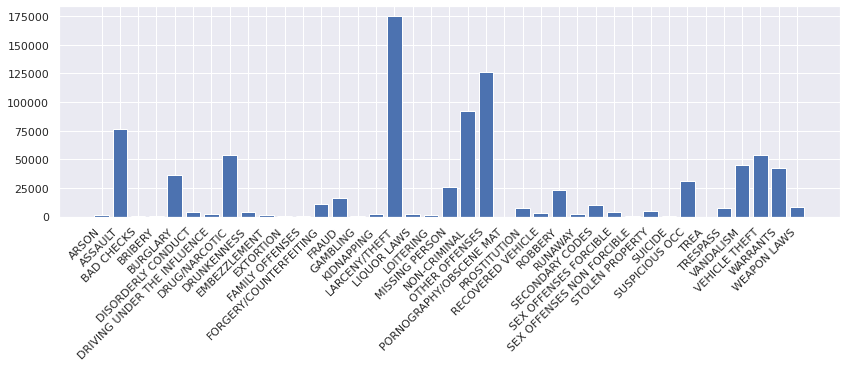

In [ ]:
categories = set(Y_train)
categories = sorted(categories)

# Get count of each kind of crime (alphabetically sorted) based on the test data
def get_categories_count():
  categories_count = []
  for crime_cat in categories:
    categories_count.append(np.sum(Y_train == crime_cat))
  return categories_count

# Plot by Category Crime
def plot_category_crime():
  categories_count = get_categories_count()
  fig, ax = plt.subplots(figsize=(14, 4)) # Set the figure of the plot
  plt.bar(categories, categories_count)
  # Rotate 45 degrees 
  plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
  plt.gcf().subplots_adjust(bottom=0.15)
  plt.show()

plot_category_crime()

> With this analysis we can see there are 39 different Crime Report Categories. The four predominant crime Categories are Larcency/Theft, Other offenses, Non-criminal and Assault.

2. Plot the locations given by the X and Y coordinate on the training data. Since there are a lot of data to plot all the coordinates (runtime error when using Scatter from plotly) we decided to use a subset of the training examples. 


In [ ]:
# Plot locations of crimes
def plot_locations_dotplot():
  X_train_Xcoord = X_train[:,4][:15000]
  X_train_Ycoord = X_train[:,5][:15000]
  # Plot with the plotly library.
  data = plotly.Scatter(x=X_train_Xcoord, y=X_train_Ycoord, text=Y_train[:15000],
                        mode='markers', textposition='bottom left',
                        hoverinfo='text')
  fig = plotly.Figure(data=[data],
                      layout=plotly.Layout(title="Crime Locations",
                                            hovermode='closest'))
  fig.show(renderer="colab")

plot_locations_dotplot()

> One of the finding is that this could be a mapping of the city. The majority of the crimes are conectrated aroung one part of the city. While going to the left and down, there seems to be less crimes, going out of the city. Which makes sense.

3. Count the number of reports for each Police Department District on the training data.

In [ ]:
# Go through the 2th column of X_train, which has the Police Deparment District
departments = set(X_train[:,2])
departments = sorted(departments)

# Get counts of reports by each department
departments_count = []
for dep in departments:
  departments_count.append(np.sum(X_train[:, 2] == dep))

print('Departments: ', departments)
print('Departments Count: ', departments_count)

Departments:  ['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK', 'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN']
Departments Count:  [89431, 85460, 78845, 119908, 105296, 49313, 45209, 157182, 65596, 81809]


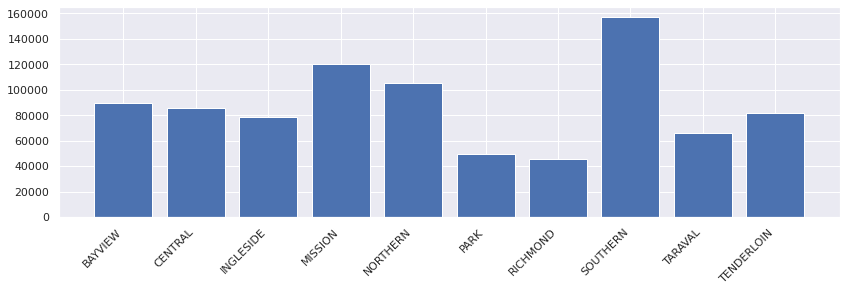

In [ ]:
# Plot by Police Department
def plot_police_department_histogram():
  fig, ax = plt.subplots(figsize=(14, 4)) # Set the figure of the plot
  plt.bar(departments, departments_count)
  # Rotate 45 degrees 
  plt.setp( ax.xaxis.get_majorticklabels(), rotation=45, ha="right" )
  plt.gcf().subplots_adjust(bottom=0.15)
  plt.show()

plot_police_department_histogram()

> From this analysis, the total number of Police Department Districts is 10. The Departments with more Crime Reports is the "Southern", the "Mission" and the "Northern".

## **Baseline**

Our first step is creating a baseline to make sure our predictions are able to outperform this bottom line, otherwise our models won't be very useful.

In order to submit our predictions, we must submit a csv file with the incident id, all candidate class names, and a probability for each class.

Since we need to provide a probability for each kind of crime, instead of getting the most common category of crime and assigning it to every id, we will count the number of times each crime occured, divide it by the total number of cases and that will be our probability for each class. Therefore, all ids will share the same probabilities, but the probability for each category of crime may be different.

In [ ]:
open_csv_file('/content/sampleSubmission.csv')

   Id  ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0      0        0           0        0         0                   0   
1   1      0        0           0        0         0                   0   
2   2      0        0           0        0         0                   0   
3   3      0        0           0        0         0                   0   
4   4      0        0           0        0         0                   0   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                            0              0            0  ...   
1                            0              0            0  ...   
2                            0              0            0  ...   
3                            0              0            0  ...   
4                            0              0            0  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  SUICIDE  SUSPICIOUS OCC  TREA  \
0                          0                0        0      

array([[     0,      0,      0, ...,      0,      1,      0],
       [     1,      0,      0, ...,      0,      1,      0],
       [     2,      0,      0, ...,      0,      1,      0],
       ...,
       [884259,      0,      0, ...,      0,      1,      0],
       [884260,      0,      0, ...,      0,      1,      0],
       [884261,      0,      0, ...,      0,      1,      0]])

In [ ]:
def create_baseline_model():
  baseline_pred = []
  categories_count = get_categories_count()
  crime_prob = np.array(categories_count) / Y_train.shape[0]
  crime_prob = crime_prob.tolist()

  # For each case in data_test, place our baseline probabilities
  for id in range(X_test.shape[0]):
    temp = crime_prob.copy()
    temp.insert(0, id)
    baseline_pred.append(temp)
  
  # Add table header
  table_header = categories.copy()
  table_header.insert(0, 'Id')
  baseline_pred.insert(0, table_header)

  # Save file as csv
  df = pd.DataFrame(baseline_pred)
  df.to_csv('baseline_pred.csv', index=False, header=False)

create_baseline_model()
open_csv_file('baseline_pred.csv')

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.001723  0.087553    0.000462  0.000329   0.04186             0.00492   
1   1  0.001723  0.087553    0.000462  0.000329   0.04186             0.00492   
2   2  0.001723  0.087553    0.000462  0.000329   0.04186             0.00492   
3   3  0.001723  0.087553    0.000462  0.000329   0.04186             0.00492   
4   4  0.001723  0.087553    0.000462  0.000329   0.04186             0.00492   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.002583       0.061467     0.004874  ...   
1                     0.002583       0.061467     0.004874  ...   
2                     0.002583       0.061467     0.004874  ...   
3                     0.002583       0.061467     0.004874  ...   
4                     0.002583       0.061467     0.004874  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000169       

array([[0.00000000e+00, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03],
       [1.00000000e+00, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03],
       [2.00000000e+00, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03],
       ...,
       [8.84259000e+05, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03],
       [8.84260000e+05, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03],
       [8.84261000e+05, 1.72313846e-03, 8.75532003e-02, ...,
        6.12505680e-02, 4.80770435e-02, 9.74319201e-03]])

This is the Loss function being used in Kaggle to get the score of a given prediction. 

Notice this is a multi-class logarithmic loss.

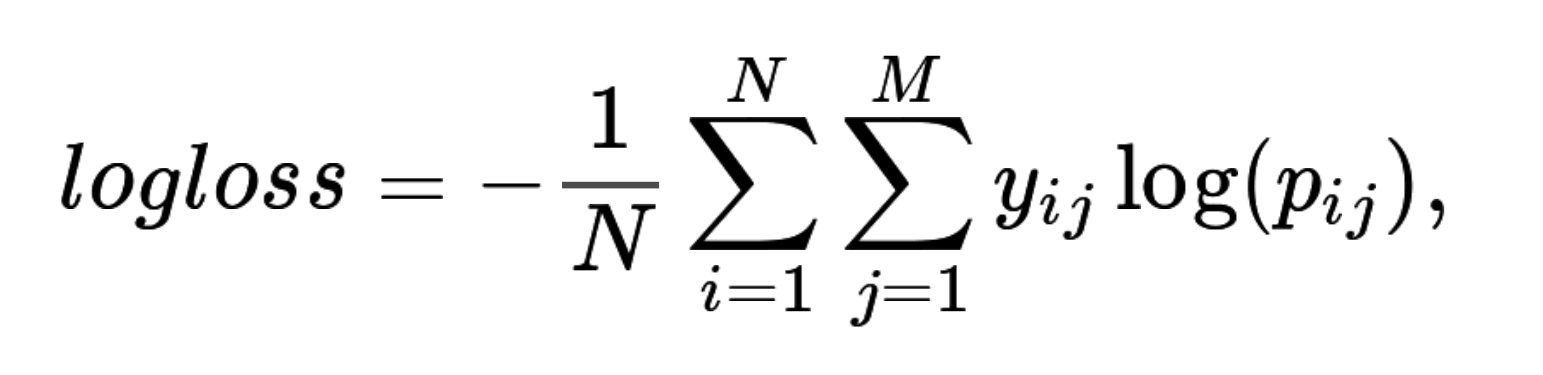

### **Results of Baseline**

After creating the Baseline, we submitted our predicitions into Kaggle. The predicted score was of 2.6

Naturally, our models would need to do better than this baseline, this will be our guideline and setmark for performance. 

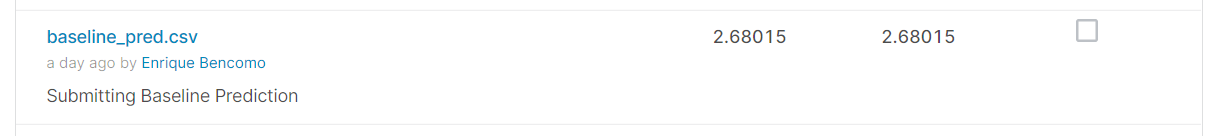

## **Feature Engineering/Data Preprocessing**

For the next step in our project, before creating our Machine Learning models, we need to decide on what features to choose and what features to create. Given some data, we will create new features that will help our Machine Learning models to perform better. 


After choosing what features, we need to represent them in a numerical way so that our models can predict correctly. The Machine Learning algorithms used in this project requires the data to be in numerical format, so data pre-processing should be in order since originally we just have string values for the data.

Ideas:
1. How to represent the date feature? The date has the following format: "2015-05-10 23:59:00". The first 4 characters corresponds to the year, the 5th character is a delimeter, the next two characters correspond to the month, the next character is a delimeter, the next two corresponds to the day. After we have the hour of the crime report, having hour, minutes and seconds.


> The representation that we're thinking is using multiple one-hot-encodings. One one-hot-encoding for the year, one for the month, one for the day.
> For representing the hour, we're thinking on a normalized value of 0-1.

2. How to represent the Day of the Week feature? This features contains a String from "Monday" to "Sunday".
> A similar idea will be to create a one-hot-encoding for this. Have 7 features, one for each day of the week.

3. How to represent the Police Deparment District? Thanks to the "Understanding the data" section we can see that there are 10 different Police Department Districts.
> We can transform this into a one-hot-encoding of 10 features, one for each Police Department.

4. Should we use the "Address" feature? 
> We think that this feature is redundant since we already have the X and Y coordinates which will tell more information regarding the ubication of a Crime report.


In [ ]:
# Eliminate the "Address" feature.
X_train = np.delete(X_train, 3, axis=1)
X_test = np.delete(X_test, 3, axis=1)

Therefore out final Data representation for our one-hot-encoding idea for our ML models will be of the following sequence
* 13 features. Representing year 2003-2015 // One-hot-encoding
* 12 features. Representing month January-December // One-hot-encoding
* 31 features. Representing day 1-31 // One-hot-encoding
* 1 feature. Representing hour 0-1 (Normalized value)
* 7 features. Representing day Monday- Sunday // One-hot-encoding
* 10 features. Representing the Police Department Disctric // One-hot-encoding
* 1 feature. Representing the X coordinate
* 1 feature. Representing the Y coordinate 

In [ ]:
# Created Dictionaries that map String to one-hot-encoding numerical representation
weekdays_dictionary = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
department_dictionary = {'BAYVIEW': 0, 'CENTRAL':1, 'INGLESIDE':2, 'MISSION':3, 'NORTHERN':4, 'PARK':5, 'RICHMOND':6, 'SOUTHERN':7, 'TARAVAL':8, 'TENDERLOIN':9}

In [ ]:
# Function that transforms a desired feature into a one-hot-encoding
# X_data: Data to be transformed
# type_dictionary: Dictionary that will change the values into its numeric value
# Position: Position of the category to be transformed into one-hot-encoding 
#   will return a numpy array with the new encoding.
def add_one_hot(X_data, type_dictionary, position):
  # Get the days features
  X_data_NN = np.copy(X_data)
  types = X_data[:,position]
  X_data_NN = np.delete(X_data_NN, position, axis=1) # Delete category colummn
  types = [type_dictionary.get(type_, 0) for type_ in types]
  types = tf.keras.utils.to_categorical(types) 

  # Add the one-hot-encoding columns into the original data
  X_data_NN = np.column_stack((X_data_NN[:, :position], types, X_data_NN[:, position:]))
  return X_data_NN

In [ ]:
# Function to split the Date Category into: Year, Month, Day, Hour (0-1) value
def process_date(data):
  # Split the date into year, month, day and hour
  date = np.array(data[:, 0]).astype('U16')
  year = np.array([int(d[:4]) for d in date])
  month = np.array([int(d[5:7]) for d in date])
  day = np.array([int(d[8:10]) for d in date])
  hour = np.array([float(d[11:13])/24 + float(d[14:16])/1440 for d in date])

  return np.column_stack((year, month, day, hour, data[:,1:]))

In [ ]:
def preprocess_data(data):
  # Extract date from features and split it
  data = process_date(data)

  # Convert features to one-hot encodings
  data = add_one_hot(data, weekdays_dictionary, 4)
  data = add_one_hot(data, department_dictionary, 11)
  return data

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

## **Model 1: Decision Tree**

For the Decision Tree we tried using our One-hot-encoding as well as just leaving

In [ ]:
# We need probs for all classes
def create_random_forest():
  model = RandomForestClassifier(n_estimators=80, max_depth=20)
  model.fit(X_train, Y_train)
  pred = model.predict_proba(X_test)
  return pred

gc.collect()
pred = create_random_forest()

In [ ]:
def create_csv(data, filename):
  # Add indices
  data = data.tolist()
  pred = []
  for id in range(len(data)):
    temp = data[id].copy()
    temp.insert(0, id)
    pred.append(temp)

  # Add table header
  table_header = categories.copy()
  table_header.insert(0, 'Id')
  pred.insert(0, table_header)

  # Save file as csv
  df = pd.DataFrame(pred)
  df.to_csv(filename, index=False, header=False, na_rep=0)

gc.collect()
create_csv(pred, 'tree_pred.csv')
open_csv_file('tree_pred.csv')

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.000585  0.107813    0.000000  0.000293  0.035561            0.000654   
1   1  0.002307  0.079492    0.000037  0.000093  0.017157            0.000992   
2   2  0.000352  0.088832    0.000000  0.000000  0.051096            0.000153   
3   3  0.000657  0.070479    0.000000  0.000135  0.022243            0.000877   
4   4  0.000657  0.070479    0.000000  0.000135  0.022243            0.000877   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.001133       0.053942     0.000437  ...   
1                     0.001497       0.075038     0.004585  ...   
2                     0.000716       0.021350     0.001628  ...   
3                     0.005624       0.014403     0.015953  ...   
4                     0.005624       0.014403     0.015953  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000000       

### **Results of Decision Tree**

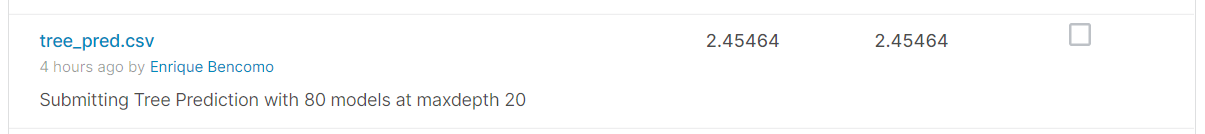

## **Model 2: Deep Neural Network**

The natural idea for having a Deep Neural Network is too add as many hidden layers as possible. Until we get something intelligent to work with and get a good Score on Kaggle.

In [ ]:
def build_ffnn_softmax_model(input_shape, n_classes, learning_rate=0.1):
  """Build a TF feed-forward neural network model using Keras.

  Args:
    input_shape: The shape of the model's input. 
    n_classes: Number of classes in dataset
    learning_rate: The desired learning rate for SGD.

  Returns:
    model: A tf.keras model (graph).
  """
  tf.keras.backend.clear_session()
  tf.random.set_seed(0)

  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=input_shape))

  model.add(keras.layers.Dense(
      units=1024,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=1024,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=1024,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=256,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=256,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=256,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=128,
      activation='relu'
  ))

  model.add(keras.layers.Dense(
      units=1028,
      activation='relu'
  ))

  # The actual layer from above (not hidden)
  model.add(keras.layers.Dense(
      units=39,
      activation='softmax'
  ))

  optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(#loss=NotImplemented,
                loss='sparse_categorical_crossentropy',
                optimizer=optimizer, 
                metrics=['accuracy'])

  return model

In [ ]:
print(X_train.shape)

print(Y_train[:10])

category_dictionary = { categories[i]:i for i in range(0, len(categories) ) }

print('Dict:', category_dictionary)

Y_train_NN = [category_dictionary.get(y_train, 0) for y_train in Y_train]
print(type(Y_train_NN))
print(type(Y_train_NN[0]))
Y_train_NN = np.asarray(Y_train_NN)
print(type(Y_train_NN))
print(Y_train_NN[:10])
print(Y_train_NN.shape)
print(type(Y_train_NN[0]))

X_train_NN = np.asarray(X_train).astype('float32') 
Y_train_NN = np.asarray(Y_train_NN).astype('int8') 

print(type(Y_train_NN[0]))
n_classes = 39
ffnn_softmax_model = build_ffnn_softmax_model(
    X_train[0].shape, n_classes, 0.1)


ffnn_softmax_history = ffnn_softmax_model.fit(
  x = X_train,
  y = Y_train_NN,
  epochs=5,
  batch_size=64,
  validation_split=0.1,
  verbose=1)

ffnn_softmax_history = pd.DataFrame(ffnn_softmax_history.history)
display(ffnn_softmax_history)

## **Model 3: Support Vector Machine**

For Support Vector Machine, we are susbstituing and/or reducing the dimensions of the data by using creating new ones that extract better the information. Since, it consumes a lot of space to create, we'll be using only a subset of the dataset. However, because of this, there are some classes that were not included and the probability for these ones was not obtained.

In [ ]:
def get_subset():
  np.random.seed(0) # For reproducibility purposes
  train_idx = np.random.permutation(np.arange(X_train.shape[0]))
  x_train, y_train = X_train[train_idx], Y_train[train_idx]

  return x_train[:10000], y_train[:10000]

In [ ]:
def create_svc():
  model = SVC(random_state=0, probability=True)
  x_subset, y_subset = get_subset()
  model.fit(x_subset, y_subset)
  pred = model.predict_proba(X_test)
  print(pred)
  return pred

pred = create_svc()

[[0.00250011 0.09684034 0.00057218 ... 0.04648829 0.05311148 0.00982503]
 [0.00249995 0.09685316 0.00057206 ... 0.04647541 0.05311088 0.00982485]
 [0.00241201 0.09161926 0.00053037 ... 0.04516411 0.05230972 0.00961621]
 ...
 [0.00329949 0.06892343 0.00124497 ... 0.06055467 0.05521918 0.01204963]
 [0.00335016 0.06877412 0.00127216 ... 0.05956069 0.05579015 0.01209344]
 [0.00329906 0.06833765 0.00124534 ... 0.05866759 0.05499106 0.0119657 ]]


In [ ]:
gc.collect()
create_csv(pred, 'svm_pred.csv')
a = open_csv_file('svm_pred.csv')
print(a[-5:, -5:])

   Id     ARSON   ASSAULT  BAD CHECKS   BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0  0.002500  0.096840    0.000572  0.000397  0.044979            0.004365   
1   1  0.002500  0.096853    0.000572  0.000397  0.044979            0.004365   
2   2  0.002412  0.091619    0.000530  0.000360  0.044568            0.004269   
3   3  0.002442  0.095704    0.000542  0.000369  0.044889            0.004295   
4   4  0.002442  0.095704    0.000542  0.000369  0.044889            0.004295   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                     0.004025       0.043070     0.005076  ...   
1                     0.004025       0.043057     0.005076  ...   
2                     0.003915       0.037626     0.004944  ...   
3                     0.003968       0.038989     0.005002  ...   
4                     0.003968       0.038989     0.005002  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY   SUICIDE  SUSPICIOUS OCC  \
0                   0.000810       

### Results of SVM

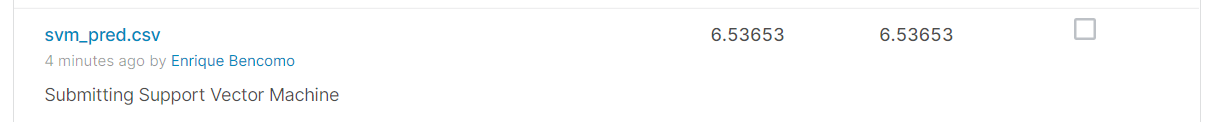

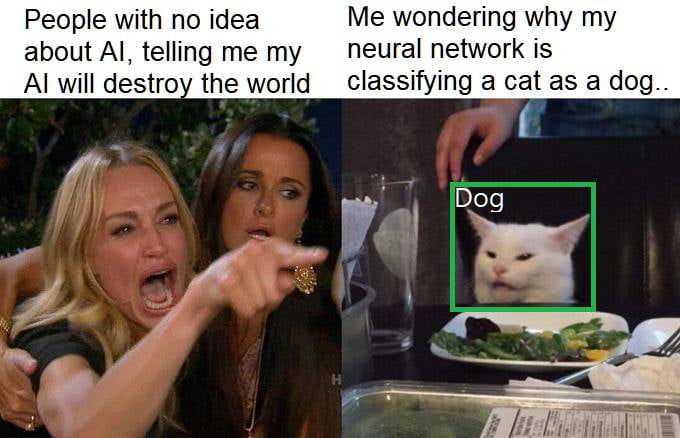